# Employee Promotion Analaysis using Artificial Intelligence

# Package Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Reading

In [2]:
Data = pd.read_csv("Datas.csv")
Data

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0  

[54808 rows x 14 columns]

# Data Preprocessing

In [3]:
Data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [4]:
Data.tail()

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0

In [5]:
Data.info

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings 

In [6]:
Data.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
Data.shape

(54808, 14)

In [8]:
Data.duplicated().sum()

0

In [9]:
Data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
Data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [11]:
Data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [12]:
Data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [13]:
Data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [14]:
Data['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

# EDA Concept

<AxesSubplot:ylabel='None'>

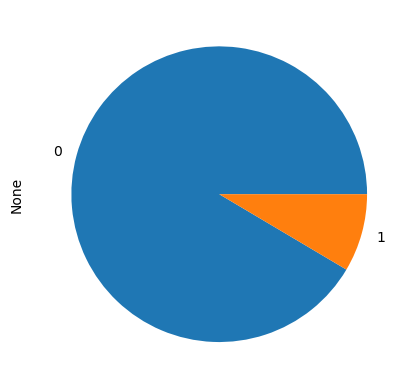

In [15]:
Data.groupby('is_promoted').size().plot(kind='pie')

<AxesSubplot:ylabel='None'>

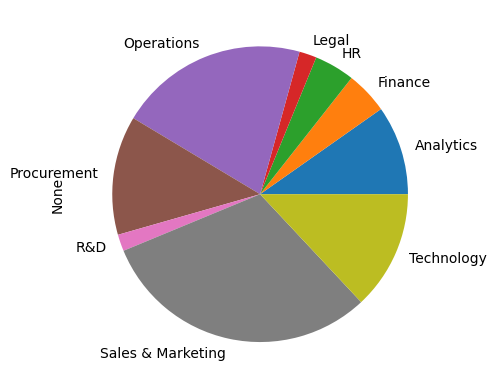

In [16]:
Data.groupby('department').size().plot(kind='pie')

<AxesSubplot:ylabel='None'>

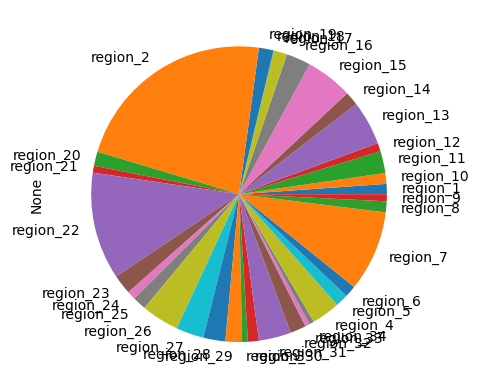

In [17]:
Data.groupby('region').size().plot(kind='pie')

<AxesSubplot:ylabel='None'>

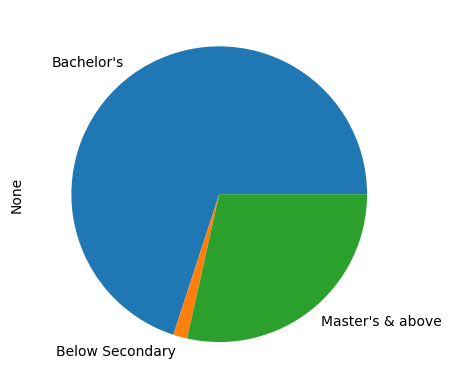

In [18]:
Data.groupby('education').size().plot(kind='pie')

<AxesSubplot:ylabel='None'>

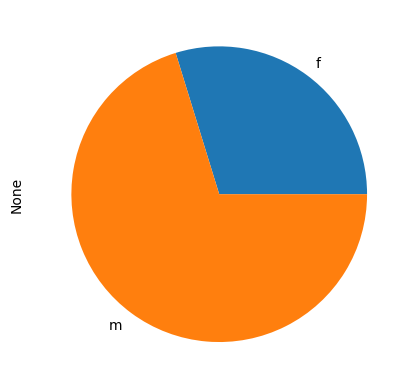

In [19]:
Data.groupby('gender').size().plot(kind='pie')

<AxesSubplot:ylabel='None'>

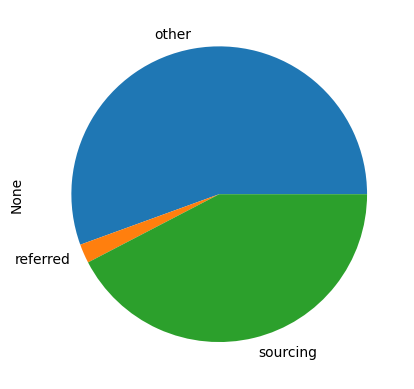

In [20]:
Data.groupby('recruitment_channel').size().plot(kind='pie')

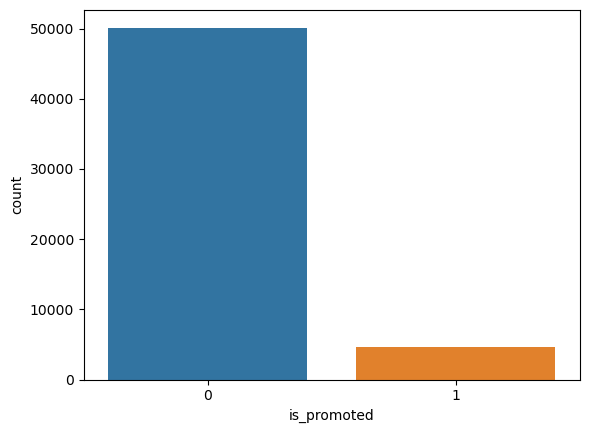

In [21]:
# count plot on single categorical variable
sns.countplot(x ='is_promoted', data = Data)
 
# Show the plot
plt.show()

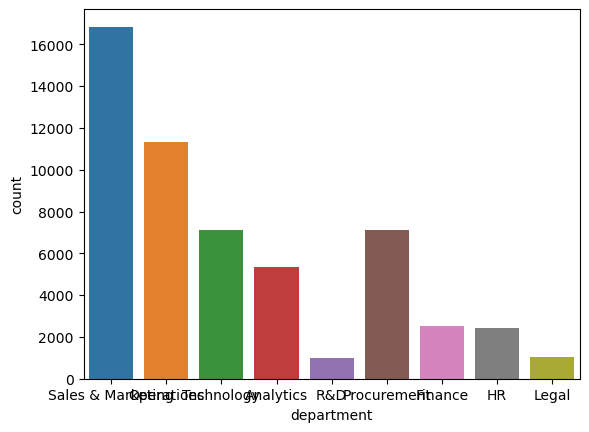

In [22]:
# count plot on single categorical variable
sns.countplot(x ='department', data = Data)
 
# Show the plot
plt.show()

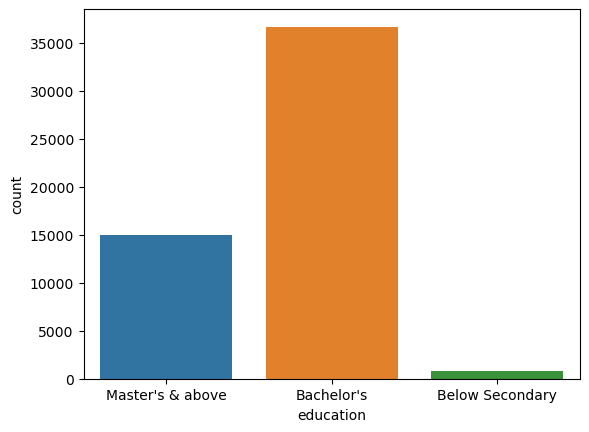

In [23]:
# count plot on single categorical variable
sns.countplot(x ='education', data = Data)
 
# Show the plot
plt.show()

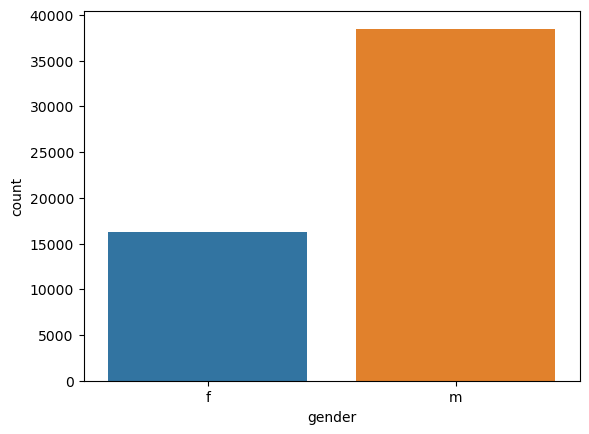

In [24]:
# count plot on single categorical variable
sns.countplot(x ='gender', data = Data)
 
# Show the plot
plt.show()

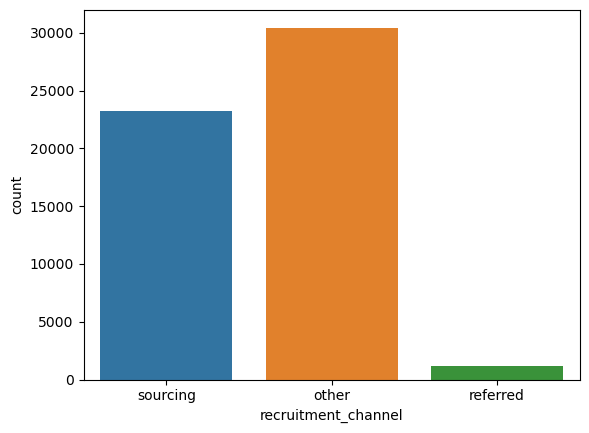

In [25]:
# count plot on single categorical variable
sns.countplot(x ='recruitment_channel', data = Data)
 
# Show the plot
plt.show()

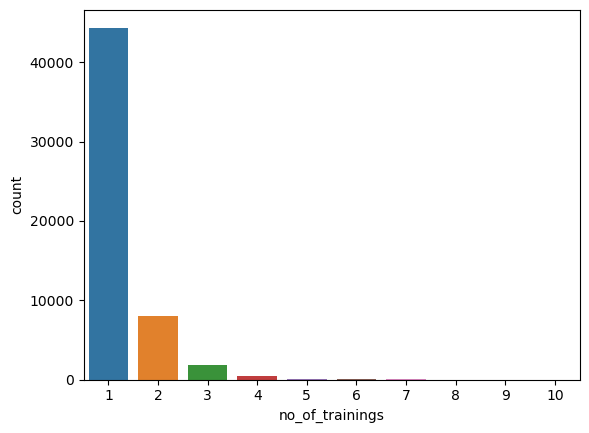

In [26]:
# count plot on single categorical variable
sns.countplot(x ='no_of_trainings', data = Data)
 
# Show the plot
plt.show()

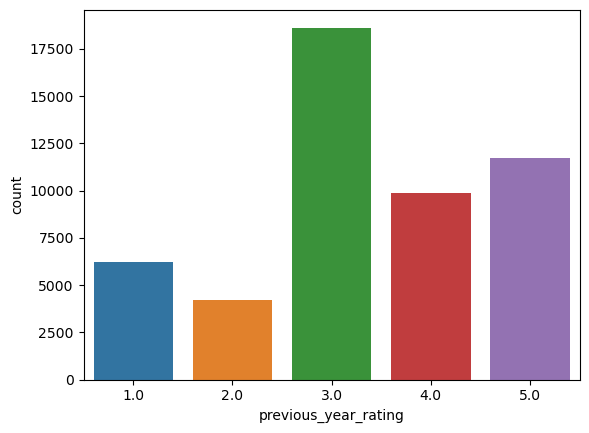

In [27]:
# count plot on single categorical variable
sns.countplot(x ='previous_year_rating', data = Data)
 
# Show the plot
plt.show()

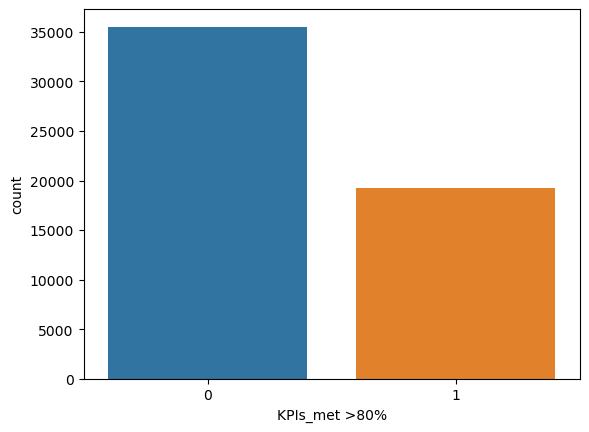

In [28]:
# count plot on single categorical variable
sns.countplot(x ='KPIs_met >80%', data = Data)
 
# Show the plot
plt.show()

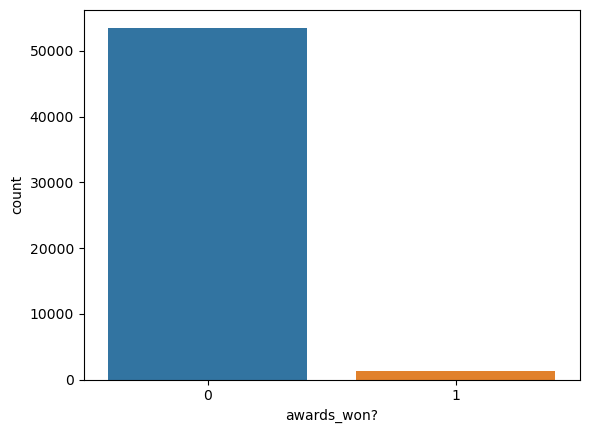

In [29]:
# count plot on single categorical variable
sns.countplot(x ='awards_won?', data = Data)
 
# Show the plot
plt.show()

C:\Users\DLK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_trainings'>

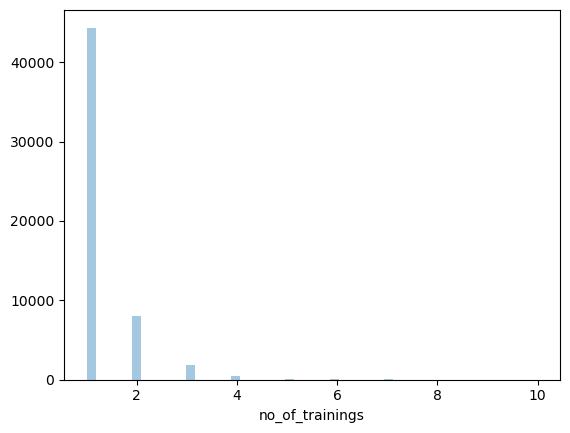

In [30]:
sns.distplot(a=Data['no_of_trainings'], kde=False)

<AxesSubplot:xlabel='age'>

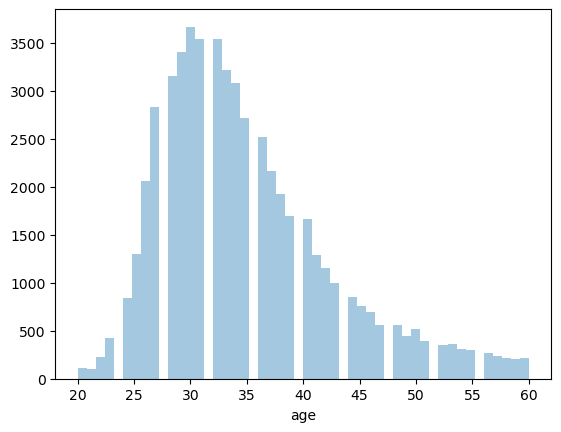

In [31]:
sns.distplot(a=Data['age'], kde=False)

<AxesSubplot:xlabel='previous_year_rating'>

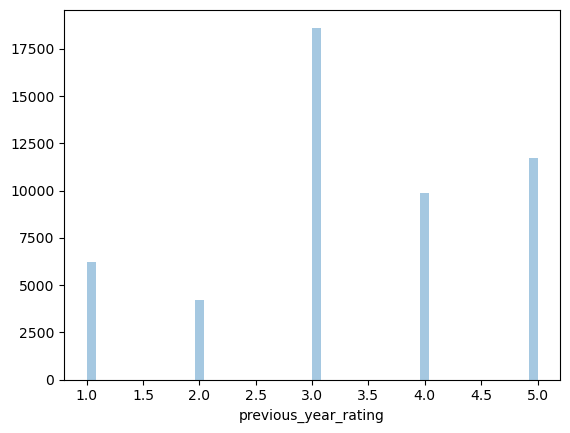

In [32]:
sns.distplot(a=Data['previous_year_rating'], kde=False)

<AxesSubplot:xlabel='length_of_service'>

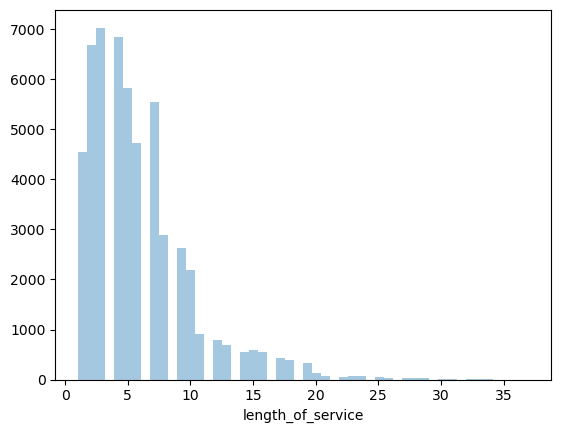

In [33]:
sns.distplot(a=Data['length_of_service'], kde=False)

<AxesSubplot:xlabel='KPIs_met >80%'>

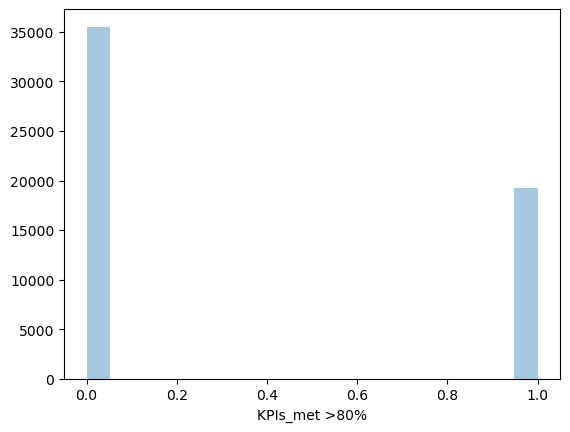

In [34]:
sns.distplot(a=Data['KPIs_met >80%'], kde=False)

<AxesSubplot:xlabel='awards_won?'>

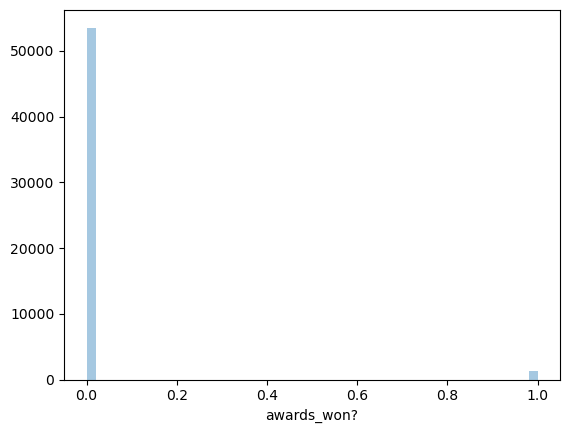

In [35]:
sns.distplot(a=Data['awards_won?'], kde=False)

<AxesSubplot:xlabel='avg_training_score'>

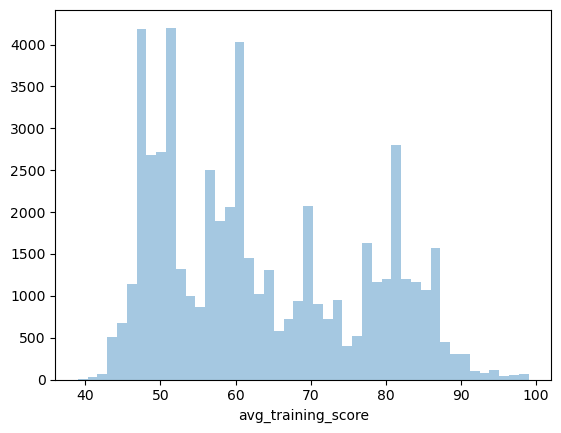

In [36]:
sns.distplot(a=Data['avg_training_score'], kde=False)

<AxesSubplot:xlabel='is_promoted'>

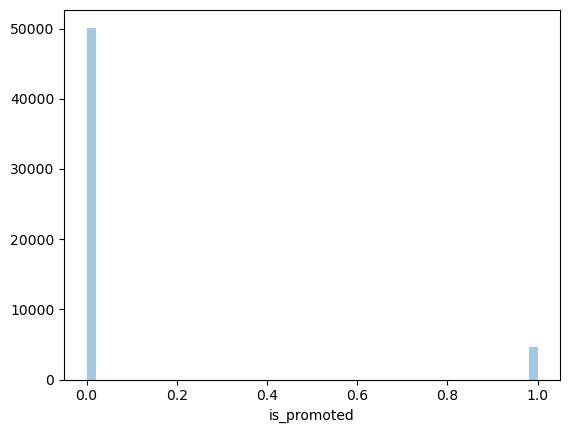

In [37]:
sns.distplot(a=Data['is_promoted'], kde=False)

<AxesSubplot:xlabel='no_of_trainings', ylabel='Density'>

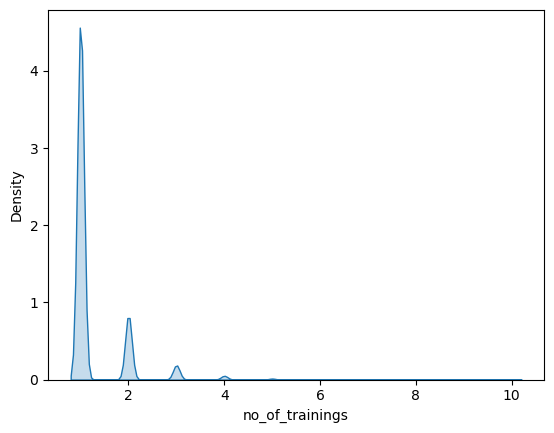

In [38]:
sns.kdeplot(data=Data['no_of_trainings'], shade=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

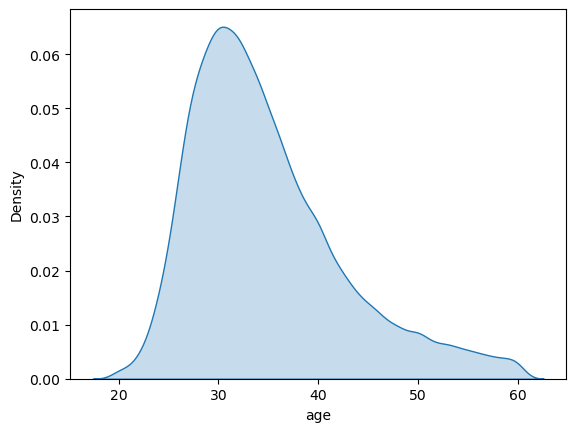

In [39]:
sns.kdeplot(data=Data['age'], shade=True)

<AxesSubplot:xlabel='previous_year_rating', ylabel='Density'>

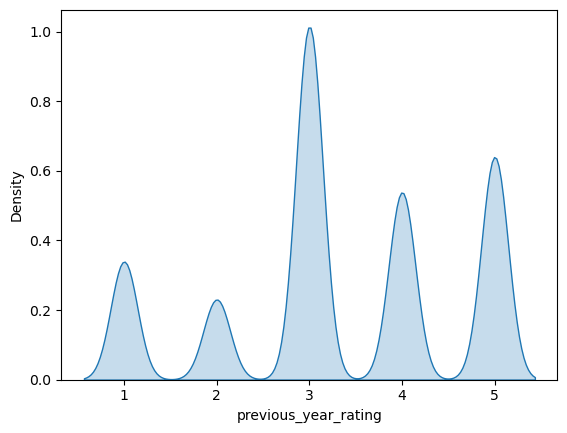

In [40]:
sns.kdeplot(data=Data['previous_year_rating'], shade=True)

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

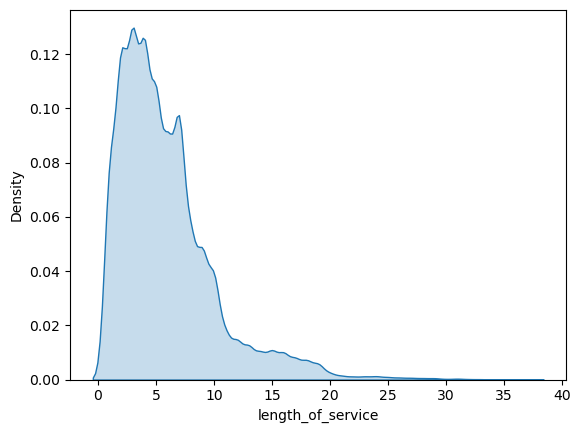

In [41]:
sns.kdeplot(data=Data['length_of_service'], shade=True)

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Density'>

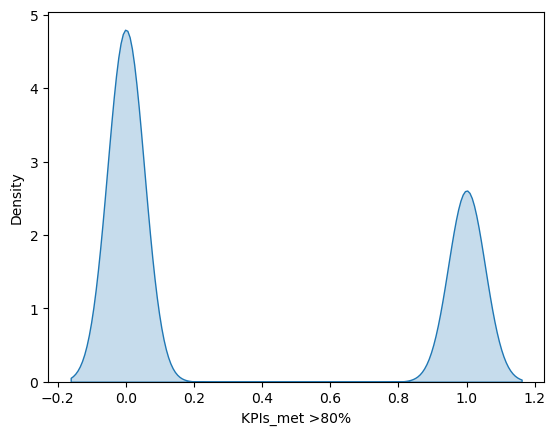

In [42]:
sns.kdeplot(data=Data['KPIs_met >80%'], shade=True)

<AxesSubplot:xlabel='awards_won?', ylabel='Density'>

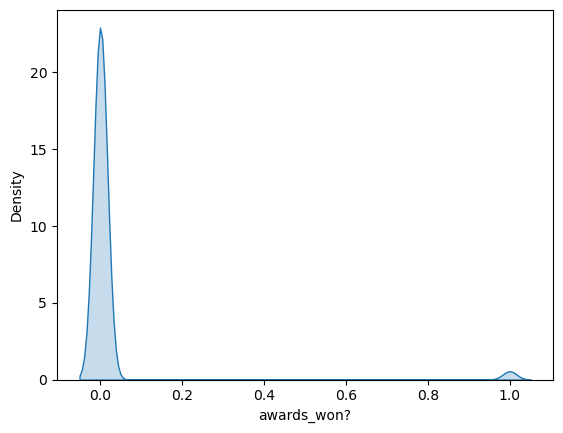

In [43]:
sns.kdeplot(data=Data['awards_won?'], shade=True)

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

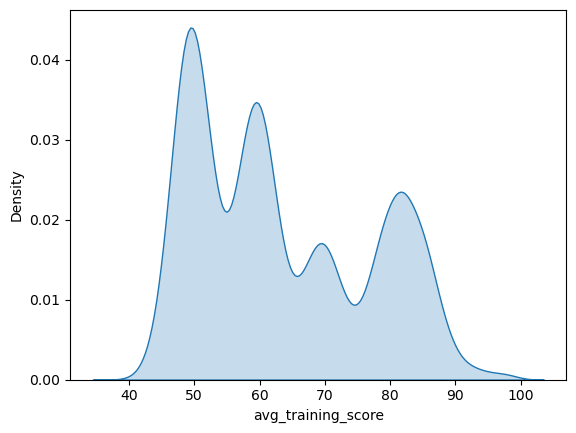

In [44]:
sns.kdeplot(data=Data['avg_training_score'], shade=True)

<AxesSubplot:xlabel='is_promoted', ylabel='Density'>

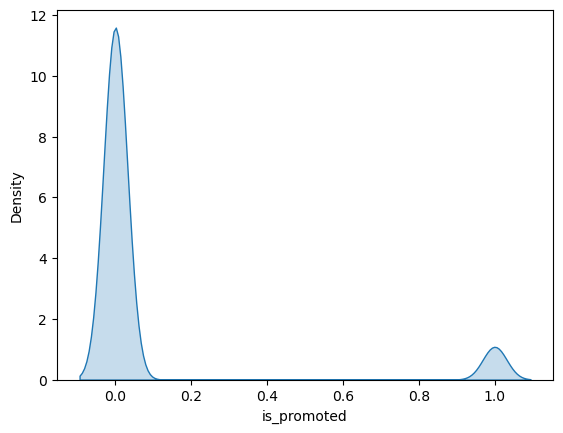

In [45]:
sns.kdeplot(data=Data['is_promoted'], shade=True)

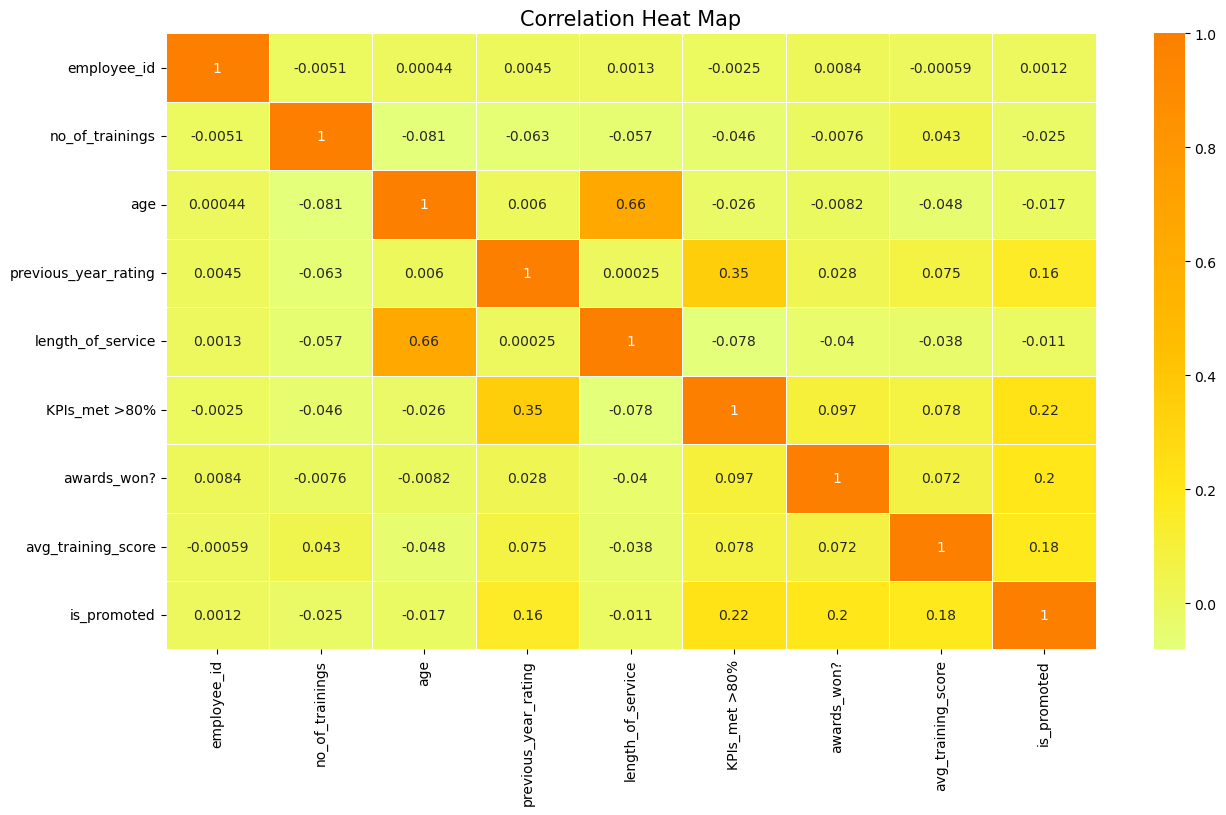

In [46]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(Data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [47]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Data, title="Report for our Project", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Aligning the data

In [48]:
Data = Data.drop('employee_id',axis=1)

In [49]:
Data = Data.drop('department',axis=1)

In [50]:
Data = Data.drop('region',axis=1)

In [51]:
Data = Data.drop('education',axis=1)

In [52]:
Data = Data.drop('gender',axis=1)

In [53]:
Data = Data.drop('recruitment_channel',axis=1)

In [54]:
Input = Data.drop('is_promoted',axis=1)
Input

no_of_trainings  age  previous_year_rating  length_of_service  \
0                    1   35                   5.0                  8   
1                    1   30                   5.0                  4   
2                    1   34                   3.0                  7   
3                    2   39                   1.0                 10   
4                    1   45                   3.0                  2   
...                ...  ...                   ...                ...   
54803                1   48                   3.0                 17   
54804                1   37                   2.0                  6   
54805                1   27                   5.0                  3   
54806                1   29                   1.0                  2   
54807                1   27                   1.0                  5   

       KPIs_met >80%  awards_won?  avg_training_score  
0                  1            0                  49  
1                  0            0                  60  
2                  0            0                  50  
3                  0            0                  50  
4                  0            0                  73  
...              ...          ...                 ...  
54803              0            0                  78  
54804              0            0                  56  
54805              1            0                  79  
54806              0            0                  45  
54807              0            0                  49  

[54808 rows x 7 columns]

In [55]:
Output = Data['is_promoted']
Output

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

# Model Implementation

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state=0)

In [57]:
X_train.shape
X_train = X_train.drop('previous_year_rating',axis = 1)

In [66]:
X_train

no_of_trainings  age  length_of_service  KPIs_met >80%  awards_won?  \
33286                1   30                  1              1            0   
3688                 1   54                  5              0            0   
48982                1   30                  5              0            0   
3014                 1   31                  3              0            0   
35788                1   36                  6              0            0   
...                ...  ...                ...            ...          ...   
45891                1   33                  4              0            0   
52416                1   32                  7              0            0   
42613                1   27                  3              1            0   
43567                1   31                  6              1            0   
2732                 1   38                  5              0            0   

       avg_training_score  
33286                  59  
3688                   64  
48982                  49  
3014                   52  
35788                  61  
...                   ...  
45891                  48  
52416                  59  
42613                  49  
43567                  79  
2732                   81  

[43846 rows x 6 columns]

In [58]:
X_test.shape
X_test = X_test.drop('previous_year_rating',axis = 1)

In [59]:
y_train.shape

(43846,)

In [60]:
y_test.shape

(10962,)

# Algorithm Implementation

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

In [65]:
y_pred_DT

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Training Accuracy : 0.958741960498107
Testing Accuracy : 0.89272030651341


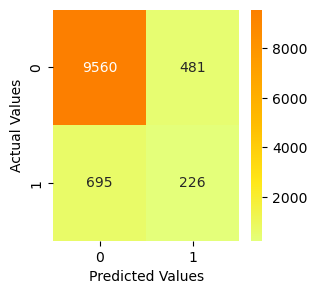

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model_DT.score(X_train, y_train))
print("Testing Accuracy :", model_DT.score(X_test, y_test))
Testing_Accuracy_DT = model_DT.score(X_test, y_test)
cm_DT = confusion_matrix(y_test, y_pred_DT)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_DT, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Support Vector Machine Algorithm

train accuracy: 0.9145418054098435
test accuracy: 0.9159824849480022


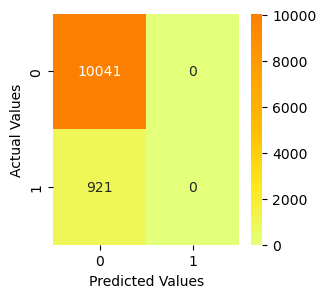

In [73]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))
Accuracy_SVM = svm.score(X_test,y_test)
prediction_SVM_all = svm.predict(X_test)
cm_SVM = confusion_matrix(y_test, prediction_SVM_all)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_SVM, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [69]:
prediction = model_DT.predict(np.array([[1, #1 no_of_trainings 
                                      30, #age
                                      1, #length_of_service
                                      1, #KPIs_met >80%
                                      1, #awards_won?
                                      789, #avg_training_score
                                        ]]))

#1-> Promotion, and 0-> No Promotion :
print("Whether the Employee should get a Promotion : ", prediction)

Whether the Employee should get a Promotion :  [1]


C:\Users\DLK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Comparison of Both the Algorithm

Text(0.5, 1.0, 'Model Accracy of both Decision Tree and Support Vaector Machine Algorithm')

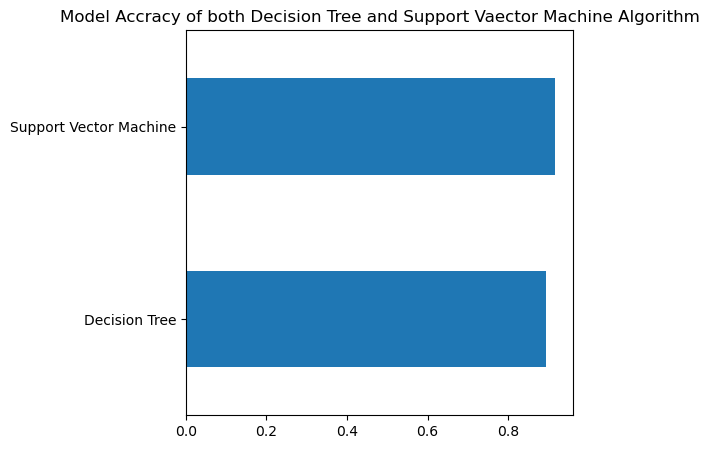

In [74]:
model_accuracy_DT_SVM = pd.Series(data=[Testing_Accuracy_DT,Accuracy_SVM], index=['Decision Tree','Support Vector Machine'])
fig= plt.figure(figsize=(5,5))
model_accuracy_DT_SVM.sort_values().plot.barh()
plt.title('Model Accracy of both Decision Tree and Support Vaector Machine Algorithm')